In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
import numpy

In [ ]:
tensorflow.__version__

'2.15.0'

In [ ]:
seed = 7
numpy.random.seed(seed)
data = numpy.loadtxt("/content/drive/MyDrive/Colab Notebooks/pima-indians-diabetes.csv", delimiter=',')


In [ ]:
data

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
X = data[:,0:8]
Y = data[:,8]

In [ ]:
len(data)

768

In [ ]:
#total 39 hidden neurons
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu')) #1st layer, 1 input and 19 hidden
model.add(Dense(10, activation='relu')) #2nd layer
model.add(Dense(10, activation='relu')) #3rd layer
model.add(Dense(1, activation='sigmoid')) #output layer

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 511 (2.00 KB)
Trainable params: 511 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X,Y, validation_split=0.3, epochs=250, batch_size=10)

Epoch 1/250
54/54 [==============================] - 1s 9ms/step - loss: 3.7472 - accuracy: 0.6350 - val_loss: 0.8223 - val_accuracy: 0.4892
Epoch 2/250
54/54 [==============================] - 0s 4ms/step - loss: 0.7105 - accuracy: 0.5661 - val_loss: 0.7106 - val_accuracy: 0.6364
Epoch 3/250
54/54 [==============================] - 0s 3ms/step - loss: 0.6413 - accuracy: 0.6164 - val_loss: 0.6841 - val_accuracy: 0.5411
Epoch 4/250
54/54 [==============================] - 0s 3ms/step - loss: 0.6252 - accuracy: 0.6220 - val_loss: 0.6810 - val_accuracy: 0.5368
Epoch 5/250
54/54 [==============================] - 0s 3ms/step - loss: 0.6202 - accuracy: 0.6369 - val_loss: 0.6761 - val_accuracy: 0.5281
Epoch 6/250
54/54 [==============================] - 0s 5ms/step - loss: 0.6108 - accuracy: 0.6369 - val_loss: 0.6709 - val_accuracy: 0.5801
Epoch 7/250
54/54 [==============================] - 0s 4ms/step - loss: 0.6010 - accuracy: 0.6667 - val_loss: 0.6628 - val_accuracy: 0.5671
Epoch 8/250
5

In [ ]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7826
accuracy: 78.26%


In [ ]:
#visualize training history
#list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

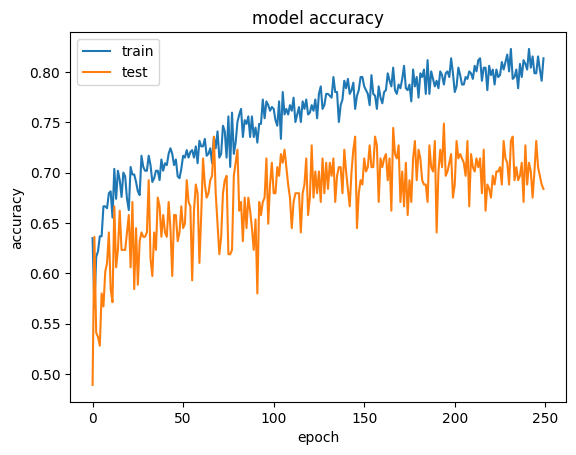

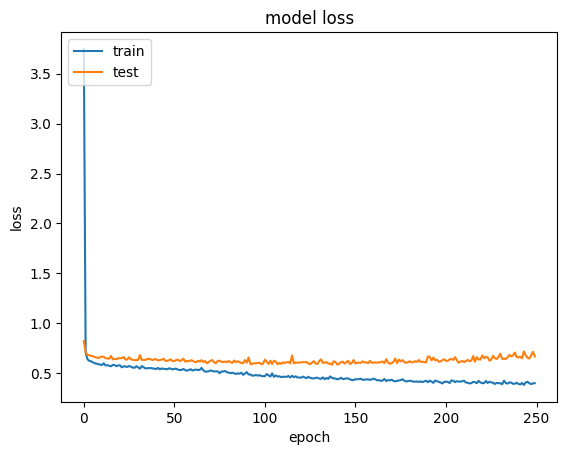

In [ ]:
#summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()